# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [133]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [56]:
df = pd.read_csv('../data/states_edu.csv')
type(df)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [61]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [70]:
print(df["YEAR"].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

Find the average for your chosen test across all states in 2019

In [69]:
michigan_avg = df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].mean()
ohio_avg = df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].mean()

if michigan_avg > ohio_avg:
    print("Michigan has a higher average in Grade 4 Reading across all years.")
else:
    print("Ohio has a higher average in Grade 4 Reading across all years.")

Ohio has a higher average in Grade 4 Reading across all years.


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [71]:
max_reading_4_scores = df.groupby("STATE")["AVG_READING_4_SCORE"].max()
print("Maximum Grade 4 Reading score for each state:")
print(max_reading_4_scores)

Maximum Grade 4 Reading score for each state:
STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE     

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [73]:
df['INSTRUCTOR_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_4']

**This feature represents the expenditure per student specifically on instructors (teachers); it relates directly to the investment in the teaching staff.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='TOTAL_EXPENDITURE', ylabel='AVG_READING_4_SCORE'>

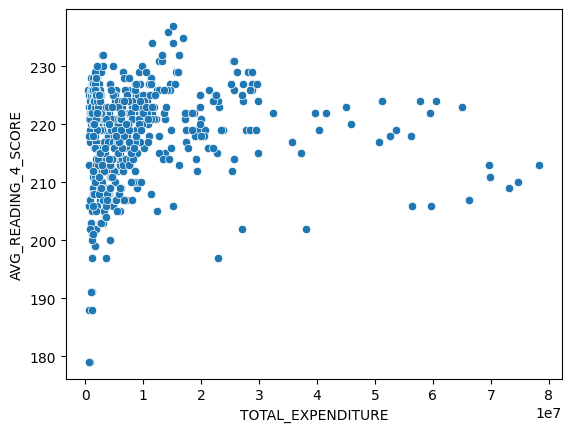

In [74]:
sns.scatterplot(x='TOTAL_EXPENDITURE', y='AVG_READING_4_SCORE', data=df)


**There appears to be a weak nonlinear relationship between total expenditure and avg reading score**

**Visualization 2**

<Axes: xlabel='INSTRUCTOR_EXPENDITURE_PER_STUDENT', ylabel='AVG_READING_4_SCORE'>

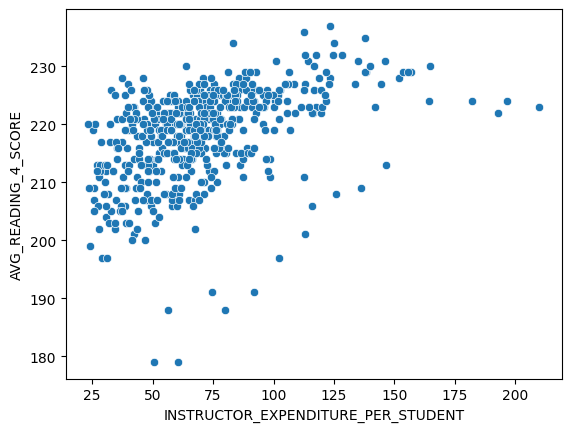

In [76]:
# Scatter plot for Grade 4 Reading scores vs. Instructor Expenditure per Student
sns.scatterplot(x='INSTRUCTOR_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', data=df)

**There appears to be a moderatly strong, positive, linear relationship between Avg Reading 4 Scores and Instructor Expenditure per Student.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X = df[['ENROLL_4','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
y.fillna(y.median(), inplace=True)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)

LinearRegression()

In [127]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

85.76241009688698
[-2.06735839e-06  1.42473788e-01  6.29509001e-01]


0.2789087039197179

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='AVG_READING_8_SCORE'>

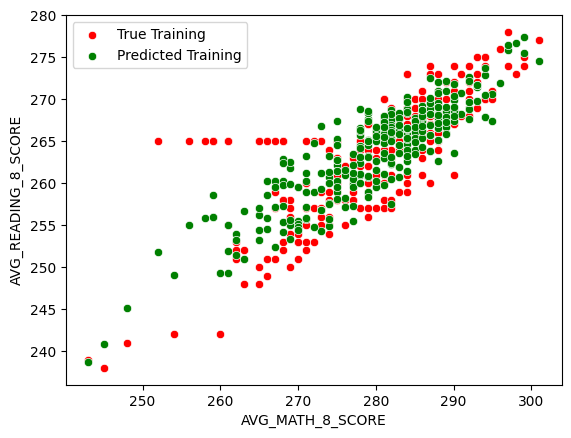

In [146]:

sns.scatterplot(x=X_train[col_name], y=y_train, color="red", label='True Training')
sns.scatterplot(x=X_train[col_name], y=model.predict(X_train), color="green", label='Predicted Training')

<Axes: xlabel='AVG_MATH_8_SCORE', ylabel='AVG_READING_8_SCORE'>

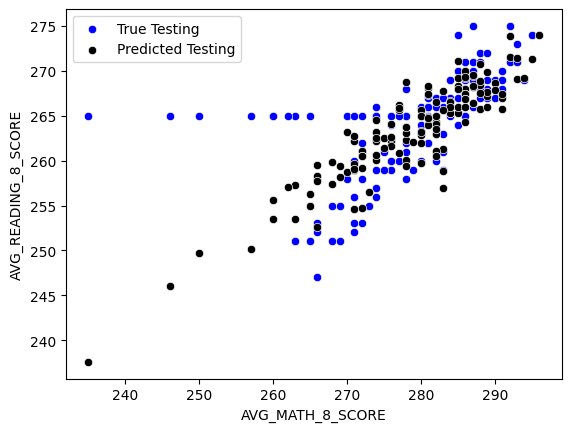

In [150]:
col_name = 'AVG_MATH_8_SCORE'
sns.scatterplot(x=X_test[col_name], y=y_test, color="blue", label='True Testing')
sns.scatterplot(x=X_test[col_name], y=model.predict(X_test), color="black", label='Predicted Testing')

<h2> Summary </h2>

**I just used the sample evaluration from the tutorial. Seems to have a strong positive correlation between the math and english reading score. We could predict that if one does good on one, then they will most likely have a farily high score in the other.**